# 1015 DSAI project

## FEP2 Group 5 (AY19/20 S2)



In this project we will be taking a look at the earthquake data set of the 2015 Gorkha earthquake in Nepal.

The data was extracted from https://www.drivendata.org/competitions/57/nepal-earthquake/ and had originally been obtained from the 2015 Nepal earthquake open data portal (http://eq2015.npc.gov.np/#/)

This data was collected through surveys by Kathmandu Living Labs and the Central Bureau of Statistics, which works under the National Planning Commission Secretariat of Nepal.

Some of the data had been submited through online surveys by the Nepalease goverment. After which, contractors would be sent down to the location to acceess the severity of the damage.

As such, we wondered if it were possible to predict the damage done to the building and the urgency in sending the a contractor down to evaluate the damge done.

There is a varible in the dataset, damage_grade, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

    1 represents low damage
    2 represents a medium amount of damage
    3 represents almost complete destruction

We would attempt to answer this question trying to predict the given damage by using the other variables provided.

There are 3 main portions to our project: Explatory data analysis 
                                          Machine learning algorithm
                                          Analaysis of Data

# Explatory data analysis

In [63]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [64]:
train = pd.read_csv('train_values.csv')
damtrain = pd.read_csv('train_labels.csv')

test = pd.DataFrame(train[-55000:])
damtest = pd.DataFrame(damtrain[-55000:])

tr_dmgG = damtrain['damage_grade'] # response 

tr_age = (train['age']) #predcitors
tr_floors = (train['count_floors_pre_eq'])
tr_height = (train['height_percentage'])
tr_area = (train['area_percentage'])

tr_dmgDF = pd.DataFrame(damtrain['damage_grade'])
tr_ageDF = pd.DataFrame(train['age'])
tr_floorsDF = pd.DataFrame(['count_floors_pre_eq'])
tr_heightDF = pd.DataFrame(train['height_percentage'])
tr_areaDF = pd.DataFrame(train['area_percentage'])

te_dmgDF = pd.DataFrame(damtest['damage_grade'])



In [65]:
train_val = pd.read_csv('train_values.csv')
train_lab = pd.read_csv('train_labels.csv')
test_val = pd.read_csv('test_values.csv')


train_val.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


### Notice the dataset types, especially "has_superstructure" and "has_secondary"

Both are int64, but actually is just boolean. True or False.

In [66]:
print(train.dtypes)

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

### Buildings were most commonly damaged by earthquakes in the train set under grade 2

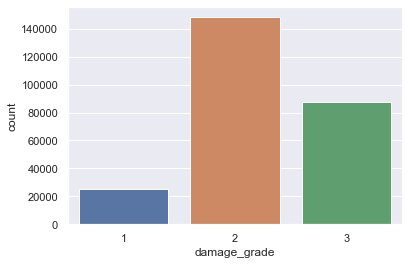

In [67]:
#countplot for damage grade in train set
sb.countplot(damtrain["damage_grade"])

### These violin plots show the distribution of our predictor variables against damage grades. We can see that area percentage seems to have the most obvious affect on damage grade increasing

Text(0.5, 1.0, 'Number of Floors')

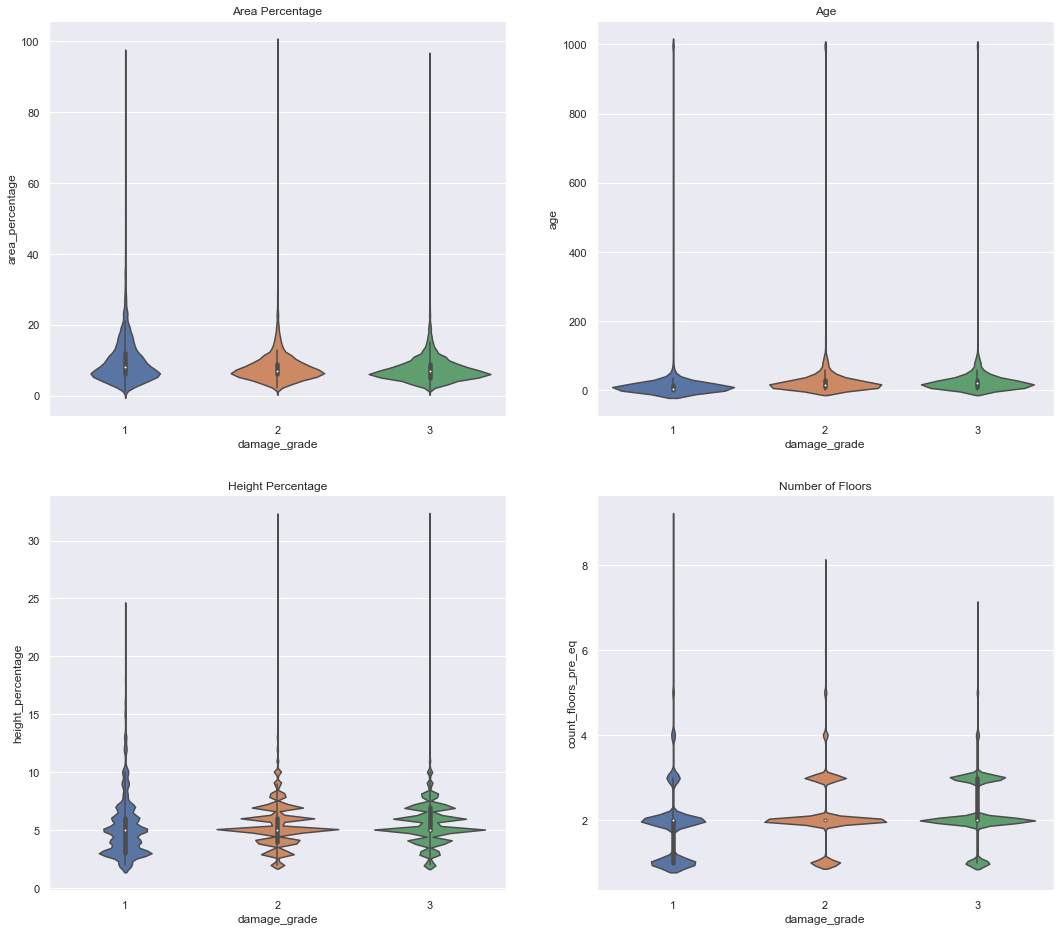

In [68]:
#violin plots of predictor vs response variable for train data

f, axes = plt.subplots(2,2, figsize=(18, 16))
sb.violinplot(x= tr_dmgG, y= tr_area, ax=axes[0,0]).set_title('Area Percentage')

sb.violinplot(x= tr_dmgG, y= tr_height, ax=axes[1,0]).set_title('Height Percentage')

sb.violinplot(x= tr_dmgG, y= tr_age, ax=axes[0,1]).set_title('Age')

sb.violinplot(x= tr_dmgG, y= tr_floors, ax=axes[1,1]).set_title('Number of Floors')




### From the boxplots, it is apparent that there is a large amount of outliers in all of our predictor variables. This may affect the accuracy of our classification

Text(0.5, 1.0, 'Number of Floors')

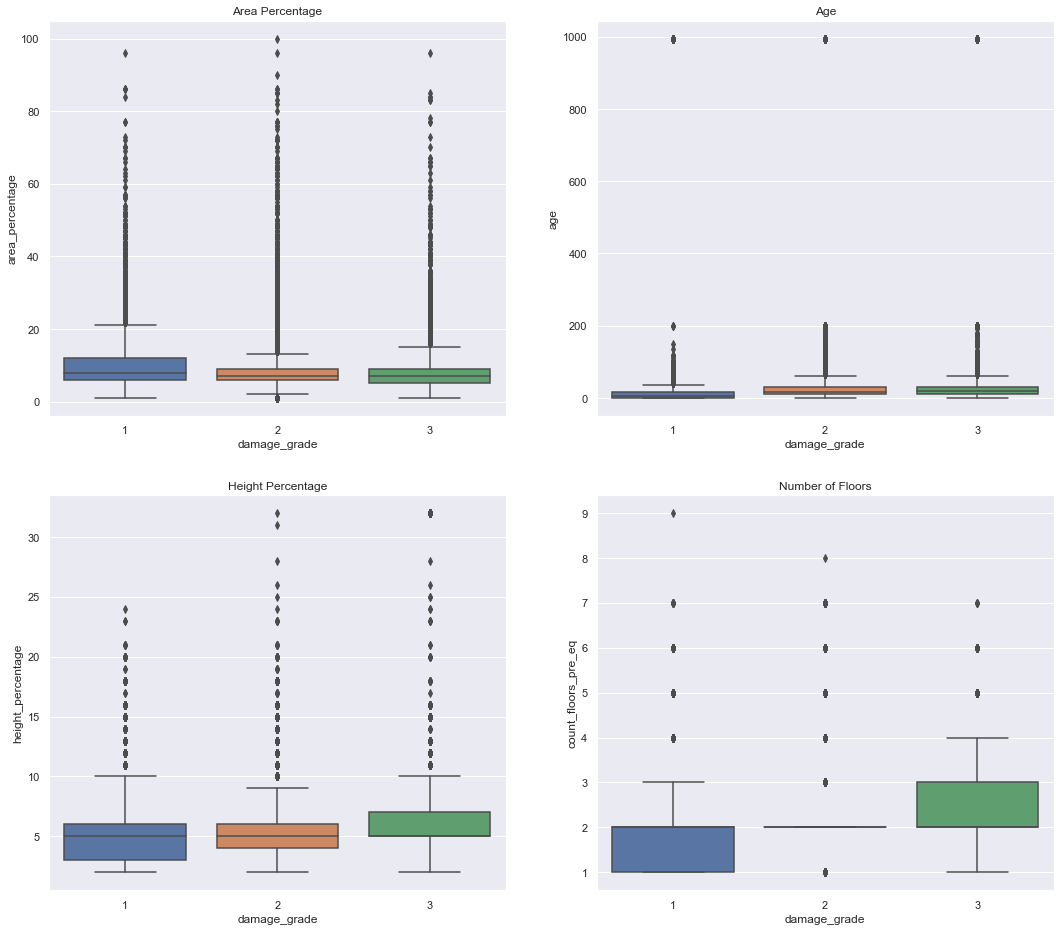

In [69]:
#boxplots plots of predictor vs response variable for train data

f, axes = plt.subplots(2,2, figsize=(18, 16))
sb.boxplot(x= tr_dmgG, y= tr_area, ax=axes[0,0]).set_title('Area Percentage')

sb.boxplot(x= tr_dmgG, y= tr_height, ax=axes[1,0]).set_title('Height Percentage')

sb.boxplot(x= tr_dmgG, y= tr_age, ax=axes[0,1]).set_title('Age')

sb.boxplot(x= tr_dmgG, y= tr_floors, ax=axes[1,1]).set_title('Number of Floors')



### These countplots show the count of damage grade values for distinct values of our predictor variables

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]),
 <a list of 84 Text xticklabel objects>)

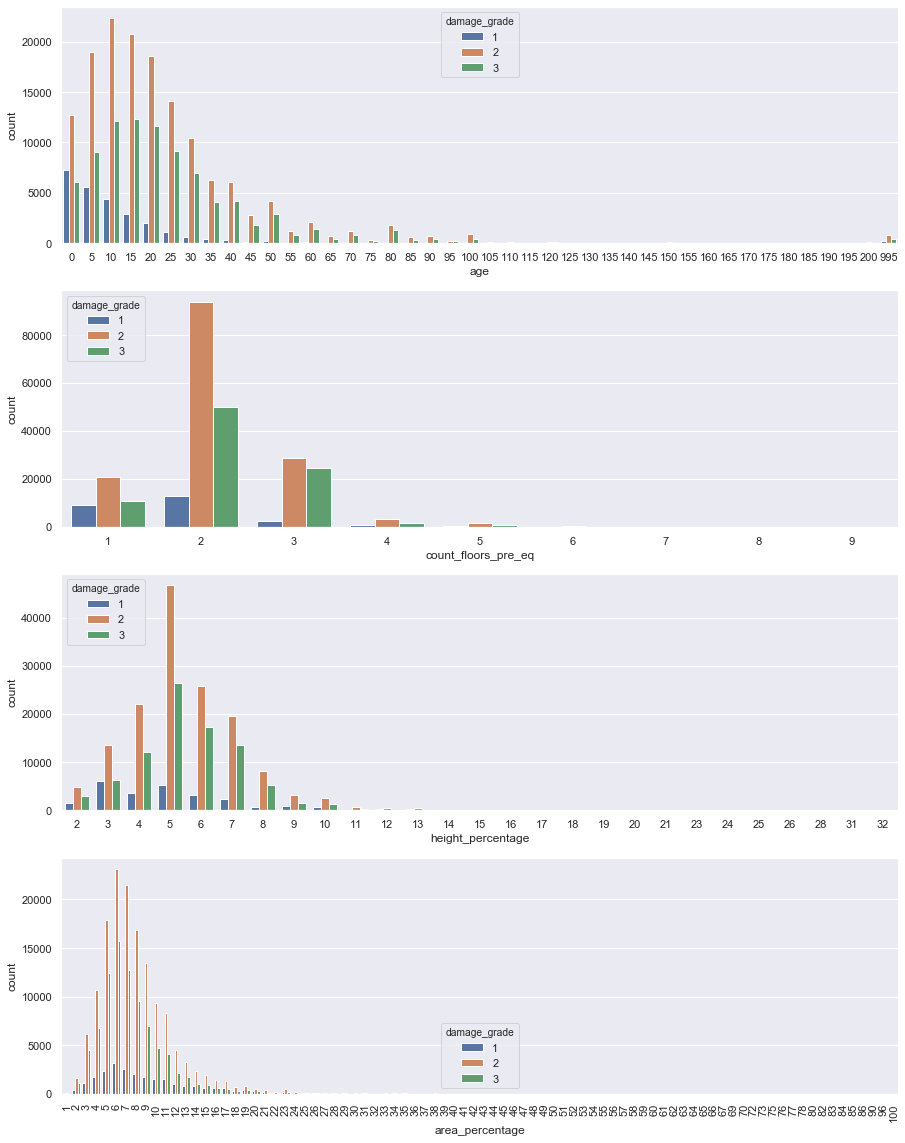

In [70]:
f, axes = plt.subplots(4,1, figsize=(15, 20))
sb.countplot(x = tr_age, hue=tr_dmgG, ax=axes[0])
sb.countplot(x = tr_floors, hue=tr_dmgG, ax = axes[1])
sb.countplot(x = tr_height, hue=tr_dmgG, ax = axes[2])
sb.countplot(x = tr_area, hue=tr_dmgG, ax=axes[3])
plt.xticks(rotation= 90)


### Counting number of materials used in the affected buildings

In [71]:
earthData = train_val.copy()

In [72]:
material = ["has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag",
            "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", 
            "has_superstructure_cement_mortar_brick", "has_superstructure_timber", "has_superstructure_bamboo",
            "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered", "has_superstructure_other"]
total = 0
for mat in material:
    total = total + earthData[mat].sum()
print(total)

380478


1    176016
2     57838
3     20210
4      4925
5      1259
6       314
7        35
8         4
Name: no_of_materials, dtype: int64


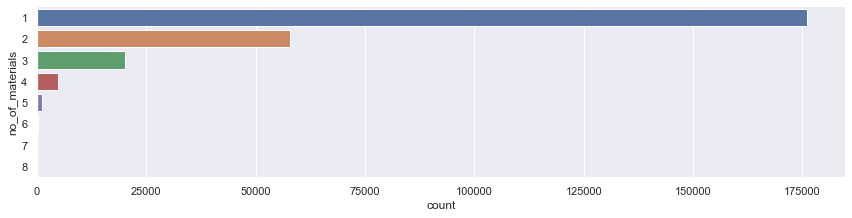

In [73]:
earthData["no_of_materials"] = 0
for mat in material:
    earthData["no_of_materials"] = earthData["no_of_materials"] + earthData[mat]
    
print(earthData["no_of_materials"].value_counts())
sb.catplot(y = "no_of_materials", data = earthData, kind = "count", height = 3, aspect = 4)

In [74]:
purpose = ['has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
           'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 
           'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 
           'has_secondary_use_other']

earthData.drop(columns = 'has_secondary_use', inplace = True)
total = 0
for usage in purpose:
    total = total + earthData[usage].sum()
print(total)

29713


0    231445
1     28599
2       557
Name: no_of_purpose, dtype: int64


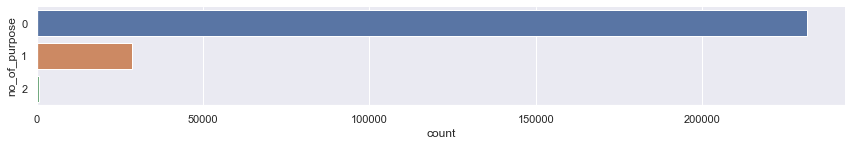

In [75]:
earthData["no_of_purpose"] = 0
for usage in purpose:
    earthData["no_of_purpose"] = earthData["no_of_purpose"] + earthData[usage]
    
print(earthData["no_of_purpose"].value_counts())
sb.catplot(y = "no_of_purpose", data = earthData, kind = "count", height = 2, aspect = 6)

### Materials of Buildings

In [76]:

material = ["has_superstructure_adobe_mud", "has_superstructure_mud_mortar_stone", "has_superstructure_stone_flag",
            "has_superstructure_cement_mortar_stone", "has_superstructure_mud_mortar_brick", 
            "has_superstructure_cement_mortar_brick", "has_superstructure_timber", "has_superstructure_bamboo",
            "has_superstructure_rc_non_engineered", "has_superstructure_rc_engineered", "has_superstructure_other"]

symbolsMat = ["Mud", "MudStone", "Stone", "CeStone", "MudBrick", "CeBrick", "Timber", "Bamboo", "RCNE", "RCE", "Others"]
relabel = list(zip(material, symbolsMat))

for mat, sym in relabel:
    earthData[mat].replace({0: None, 1:sym}, inplace = True)

In [77]:
earthData2 = earthData.copy()

In [78]:
mat_columns = ['1st_mat', '2nd_mat', '3rd_mat', '4th_mat', '5th_mat', '6th_mat', '7th_mat', '8th_mat']
for col in mat_columns:
    earthData2[col] = None

for row in range(earthData2.index.size):
    counter = 0
    for mat in material:
        if (earthData2.at[row, mat] != None):
            earthData2.at[row, mat_columns[counter]] = earthData2.at[row, mat]
            counter = counter + 1

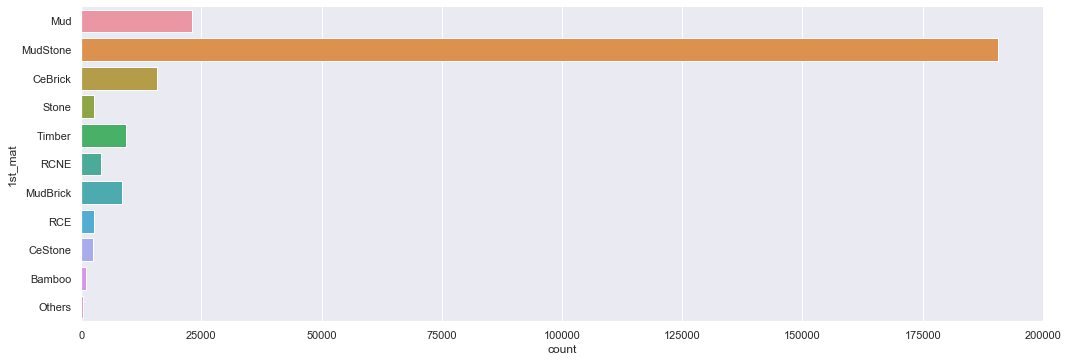

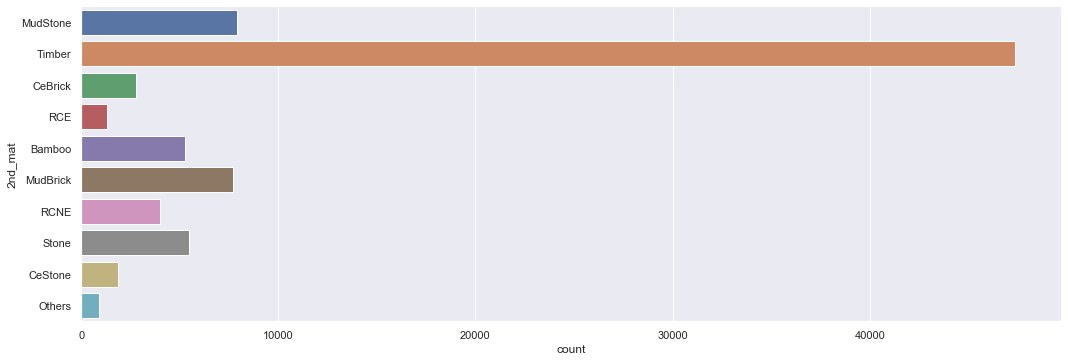

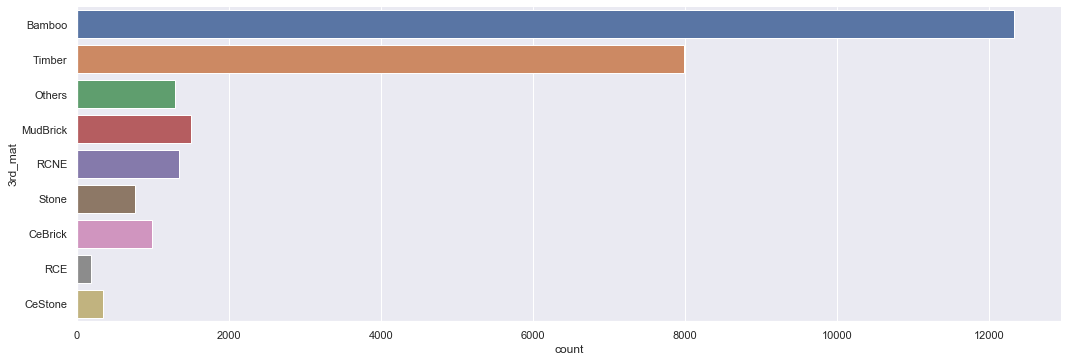

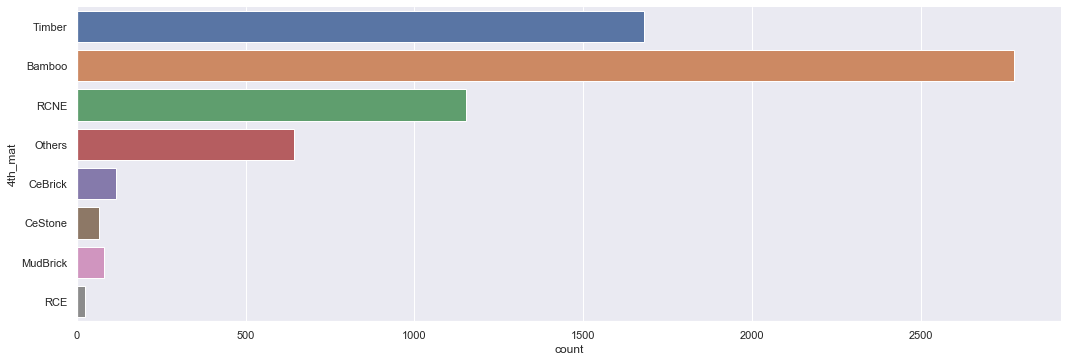

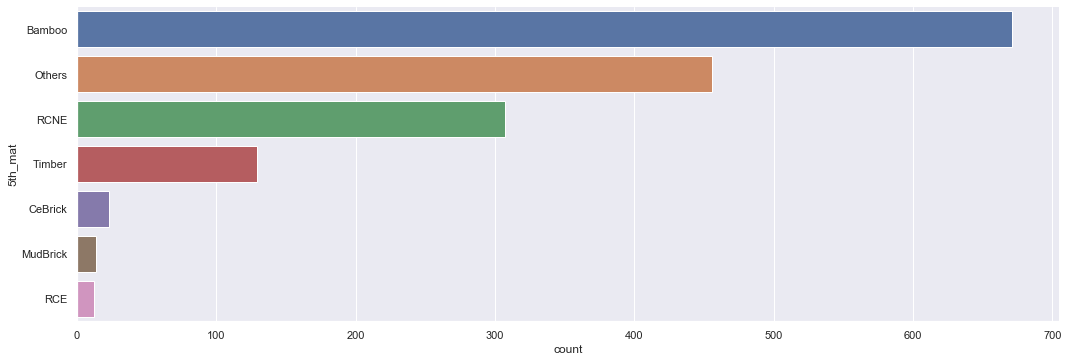

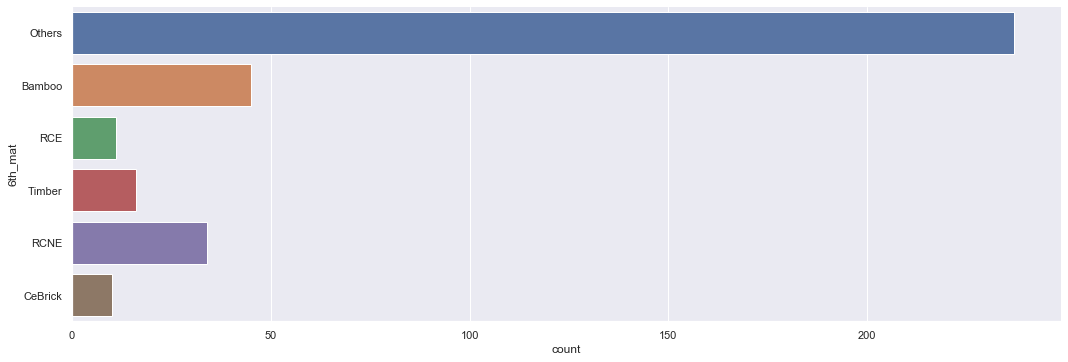

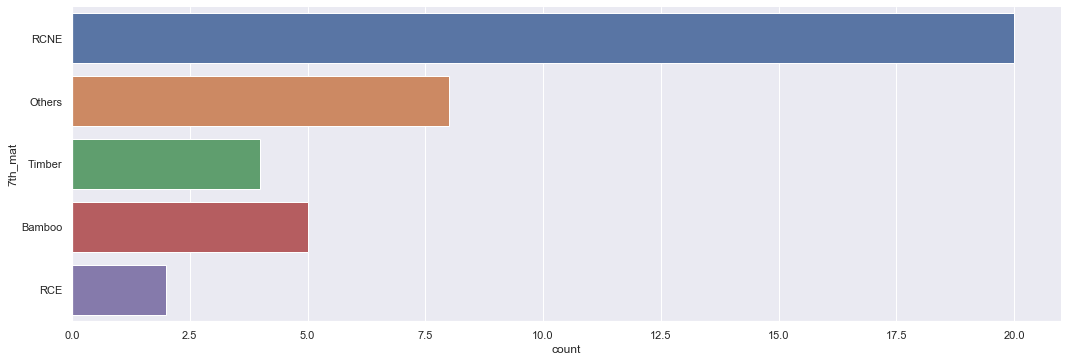

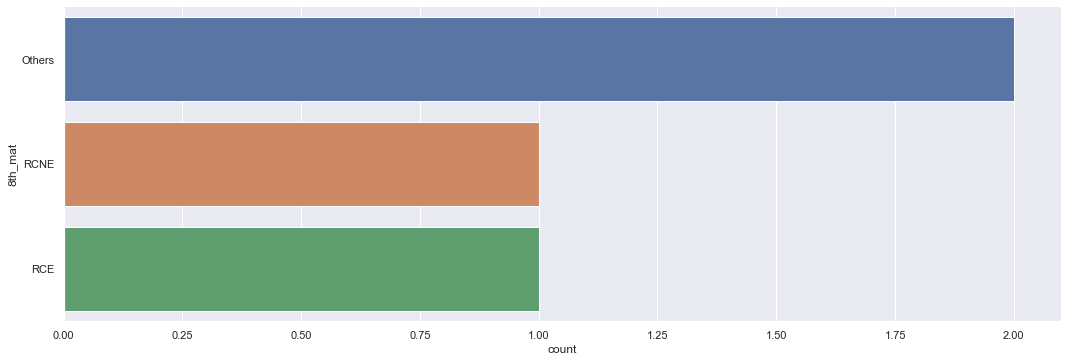

In [79]:
for col in mat_columns:
    sb.catplot(y = col, data = earthData2, kind = "count", height = 5, aspect = 3)